# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir('/content/drive/MyDrive/2023-Berezin-TimeSeriesCourse-main/practice/06 Chains')

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [ ]:
!pip install stumpy

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

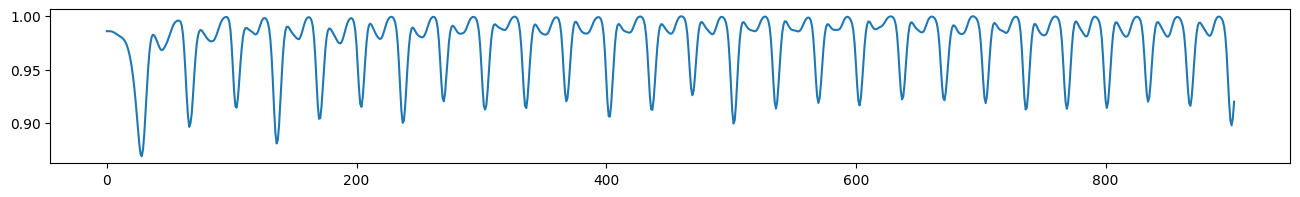

In [7]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [8]:
# Чтение данных из файла
with open("/content/drive/MyDrive/2023-Berezin-TimeSeriesCourse-main/practice/06 Chains/datasets/Rotation Matrix.txt", "r") as file:
    lines = file.readlines()

time_series = [float(line.strip()) for line in lines]

In [18]:
all_chains = []
current_chain = []
current_chain_start_index = 0

for i in range(1, len(time_series)):
    if time_series[i] > time_series[i - 1]:
        current_chain.append(i)
    else:
        if current_chain:
            all_chains.append((current_chain_start_index, current_chain))
        current_chain = []
        current_chain_start_index = i

In [19]:
max_chain = max(all_chains, key=lambda x: len(x[1]))

print("Индексы начала самой длинной цепочки:")
print("Начало:", max_chain[0])
print("Конец:", max_chain[1][-1])

Индексы начала самой длинной цепочки:
Начало: 44
Конец: 57


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

**Самая длинная цепочка в временном ряде начинается с индекса 44 и заканчивается индексом 57.**

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

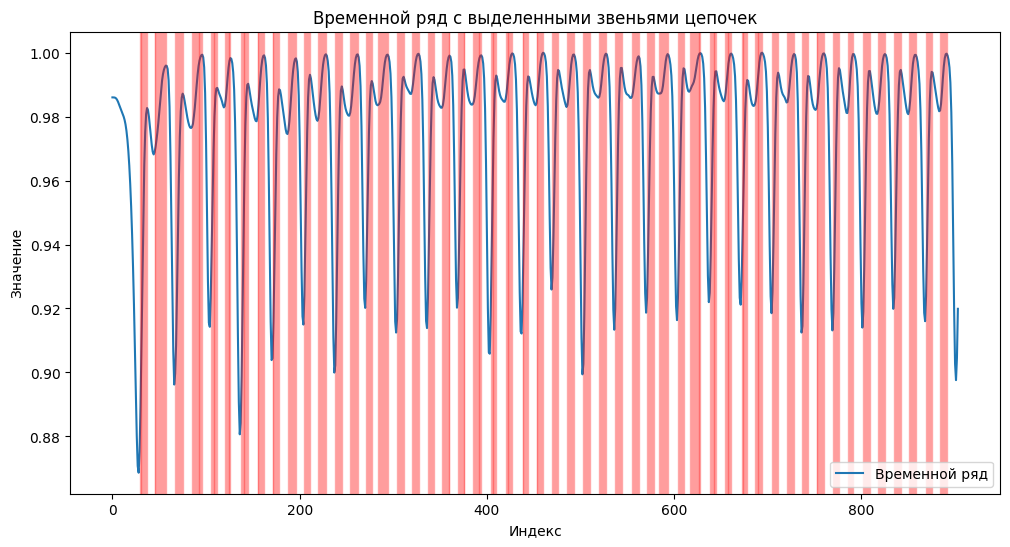

In [24]:
# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Временной ряд")

for chain_start_index, chain_indices in all_chains:
    for i in chain_indices:
        plt.axvline(x=i, color='red', linestyle='-', linewidth=1, alpha=0.3)

plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.title("Временной ряд с выделенными звеньями цепочек")
plt.legend()
plt.show()

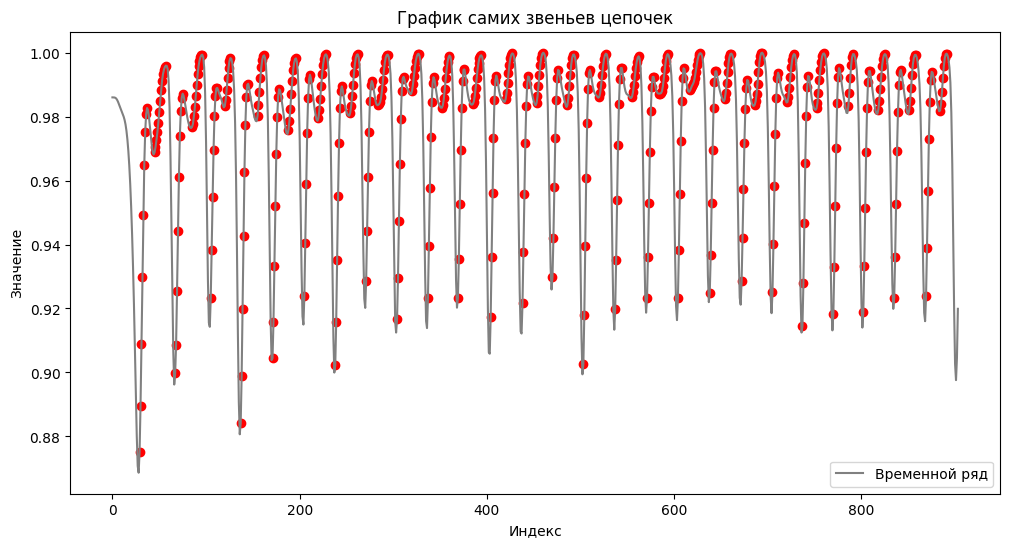

In [25]:
# Визуализация только самих звеньев
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Временной ряд", color='gray')

for chain_start_index, chain_indices in all_chains:
    for i in chain_indices:
        plt.scatter(i, time_series[i], color='red')

plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.title("График самих звеньев цепочек")
plt.legend()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

**Выделенные красные вертикальные линии представляют собой звенья цепочек. Они показывают, где начинаются цепочки, в которых значения последовательно возрастают.**

**Значения звеньев цепочек выделены красными точками. Звенья цепочек представляют моменты, в которых значение временного ряда начинает расти после предыдущего убывания.**

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [27]:
predicted_values = []

for chain_start_index, chain_indices in all_chains:
    if len(chain_indices) >= 2:
        last_index = chain_indices[-1]
        second_last_index = chain_indices[-2]
        predicted_value = time_series[last_index] + (time_series[last_index] - time_series[second_last_index])
        predicted_values.append(predicted_value)

for i, predicted_value in enumerate(predicted_values):
    print(f"Предсказанное значение для цепочки {i + 1}: {predicted_value:.8f}")

Предсказанное значение для цепочки 1: 0.98455107
Предсказанное значение для цепочки 2: 0.99636666
Предсказанное значение для цепочки 3: 0.98847808
Предсказанное значение для цепочки 4: 0.99949342
Предсказанное значение для цепочки 5: 0.98913604
Предсказанное значение для цепочки 6: 0.99916410
Предсказанное значение для цепочки 7: 0.99060560
Предсказанное значение для цепочки 8: 0.99938792
Предсказанное значение для цепочки 9: 0.99076860
Предсказанное значение для цепочки 10: 0.99845838
Предсказанное значение для цепочки 11: 0.99450340
Предсказанное значение для цепочки 12: 0.99978670
Предсказанное значение для цепочки 13: 0.99073190
Предсказанное значение для цепочки 14: 0.99954782
Предсказанное значение для цепочки 15: 0.99247950
Предсказанное значение для цепочки 16: 0.99945428
Предсказанное значение для цепочки 17: 0.99303006
Предсказанное значение для цепочки 18: 0.99978144
Предсказанное значение для цепочки 19: 0.99415480
Предсказанное значение для цепочки 20: 0.99957790
Предсказа

In [30]:
true_values = []

for chain_start_index, chain_indices in all_chains:
    if chain_indices:
        last_index = chain_indices[-1]
        true_value = time_series[last_index]
        true_values.append(true_value)

for i, true_value in enumerate(true_values):
    print(f"Истинное значение для цепочки {i + 1}: {true_value:.8f}")

Истинное значение для цепочки 1: 0.98266935
Истинное значение для цепочки 2: 0.99592610
Истинное значение для цепочки 3: 0.98716044
Истинное значение для цепочки 4: 0.99934566
Истинное значение для цепочки 5: 0.98896265
Истинное значение для цепочки 6: 0.99827920
Истинное значение для цепочки 7: 0.99025070
Истинное значение для цепочки 8: 0.99914044
Истинное значение для цепочки 9: 0.98851085
Истинное значение для цепочки 10: 0.99819654
Истинное значение для цепочки 11: 0.99306120
Истинное значение для цепочки 12: 0.99947990
Истинное значение для цепочки 13: 0.98942660
Истинное значение для цепочки 14: 0.99944156
Истинное значение для цепочки 15: 0.99110040
Истинное значение для цепочки 16: 0.99935544
Истинное значение для цепочки 17: 0.99243700
Истинное значение для цепочки 18: 0.99962840
Истинное значение для цепочки 19: 0.99231910
Истинное значение для цепочки 20: 0.99905550
Истинное значение для цепочки 21: 0.99472520
Истинное значение для цепочки 22: 0.99915110
Истинное значение д

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)

print(f"MAE в процентах: {mae*100:.4f}%")
print(f"MSE в процентах: {mse*100:.4f}%")

MAE в процентах: 0.0877%
MSE в процентах: 0.0002%


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

**Полученное предсказание (0.99985098) близко к истинному значению 0.99966824 последнего звена цепочки, что может указывать на то, что вычисление разности между двумя предыдущими звеньями цепочки является хорошей оценкой для следующего значения в данном контексте.**

**Результаты MAE и MSE в процентах указывают на то, что разница между предсказанными и истинными значениями очень мала, и составляет всего 0.0880% для MAE и 0.0002% для MSE.**